# XGBoost

### Importamos las librerías

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import xgboost as xgb

### Leemos los archivos

In [5]:
df_train_labels = pd.read_csv('./../datasets/train_labels.csv')
df_train_values = pd.read_csv('./../datasets/train_values_FE.csv')

#### Eliminamos el building id para pdoer hacer las predicciones

In [71]:
df_train_labels_filtrados = df_train_labels.drop(['building_id'], axis=1)
df_train_values_filtrados = df_train_values.drop(['building_id'], axis=1)
df_train_labels_filtrados['damage_grade'] = df_train_labels_filtrados['damage_grade'] - 1
df_train_labels_filtrados

,damage_grade
0,2
1,1
2,2
3,1
4,2
...,...
260596,1
260597,2
260598,2
260599,1


#### Implementamos el algoritmo

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train_values_filtrados, df_train_labels_filtrados, test_size=0.3, random_state=123)

In [180]:
xg_reg = xgb.XGBClassifier(objective ='multi:softprob')

In [181]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_reg.fit(X_train, y_train, early_stopping_rounds=80, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)

/home/nahuel/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nahuel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-merror:0.33222	validation_0-mlogloss:0.97162	validation_1-merror:0.33324	validation_1-mlogloss:0.97203
[1]	validation_0-merror:0.33046	validation_0-mlogloss:0.89336	validation_1-merror:0.33167	validation_1-mlogloss:0.89392
[2]	validation_0-merror:0.32887	validation_0-mlogloss:0.84264	validation_1-merror:0.33012	validation_1-mlogloss:0.84363
[3]	validation_0-merror:0.32810	validation_0-mlogloss:0.80652	validation_1-merror:0.32913	validation_1-mlogloss:0.80809
[4]	validation_0-merror:0.33111	validation_0-mlogloss:0.78106	validation_1-merror:0.33254	validation_1-mlogloss:0.78280
[5]	validation_0-merror:0.33007	validation_0-mlogloss:0.76133	validation_1-merror:0.33227	validation_1-mlogloss:0.76358
[6]	validation_0-merror:0.32588	validation_0-mlogloss:0.74650	validation_1-merror:0.32709	validation_1-mlogloss:0.74921
[7]	validation_0-merror:0.32522	validation_0-mlogloss:0.73501	validation_1-merror:0.32651	validation_1-mlogloss:0.73803
[8]	validation_0-merror:0.32482	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [182]:
preds = xg_reg.predict(X_test)

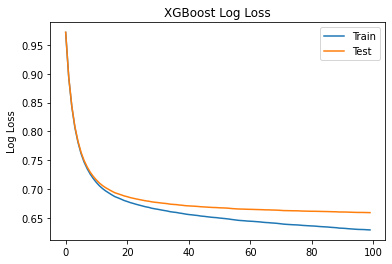

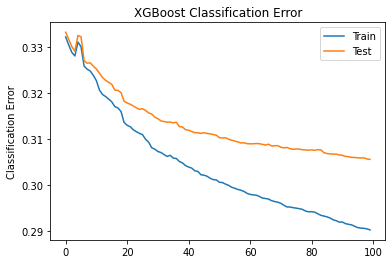

In [183]:
# retrieve performance metrics
results = xg_reg.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [184]:
error = f1_score(y_test, preds, average='micro')
error

0.6943630805438662

### Error de entrenamiento

In [98]:
xg_reg.score(X_train, y_train)

0.686804489639294

### Error de generalización o testing

In [99]:
xg_reg.score(X_test, y_test)

0.6812033537345792